In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
# np.random.seed(42)

In [3]:
# Parameters
N = 100  # number of nodes
alpha = 1.0  # decay rate
beta = 1.0  # interaction strength
dt = 0.01  # time step
steps = 20000  # total steps

In [4]:
# Using Barabási-Albert model which creates networks with gamma ≈ 3
m = 2 # number of edges to attach from a new node to existing nodes
G = nx.barabasi_albert_graph(N, m)
A = nx.adjacency_matrix(G).toarray()

# Initialize state vector x
x = np.zeros(N)
# Set last 10 nodes to random values between 0 and 0.1
x[90:] = np.random.uniform(0, 1, 10) /10
x[90] = x[90]*10

# Store history for plotting
x_history = np.zeros((steps + 1, N))
x_history[0] = x

In [5]:
# Simulation using Euler method
def simulate_step(x, A, alpha, beta, dt):
    # Calculate sum of Aij*xj for each i
    interaction_term = np.dot(A, x)
    
    # Calculate dx/dt for each node
    dxdt = -alpha * x + beta * (1 - x) * interaction_term
    
    # Euler step
    x_new = x + dt * dxdt
    
    # Ensure values stay in [0, 1]
    x_new = np.clip(x_new, 0, 1)
    
    return x_new

In [6]:
# Run simulation
for t in range(steps):
    x = simulate_step(x, A, alpha, beta, dt)
    x_history[t + 1] = x

In [7]:
# Create time array
time = np.arange(0, (steps + 1) * dt, dt)

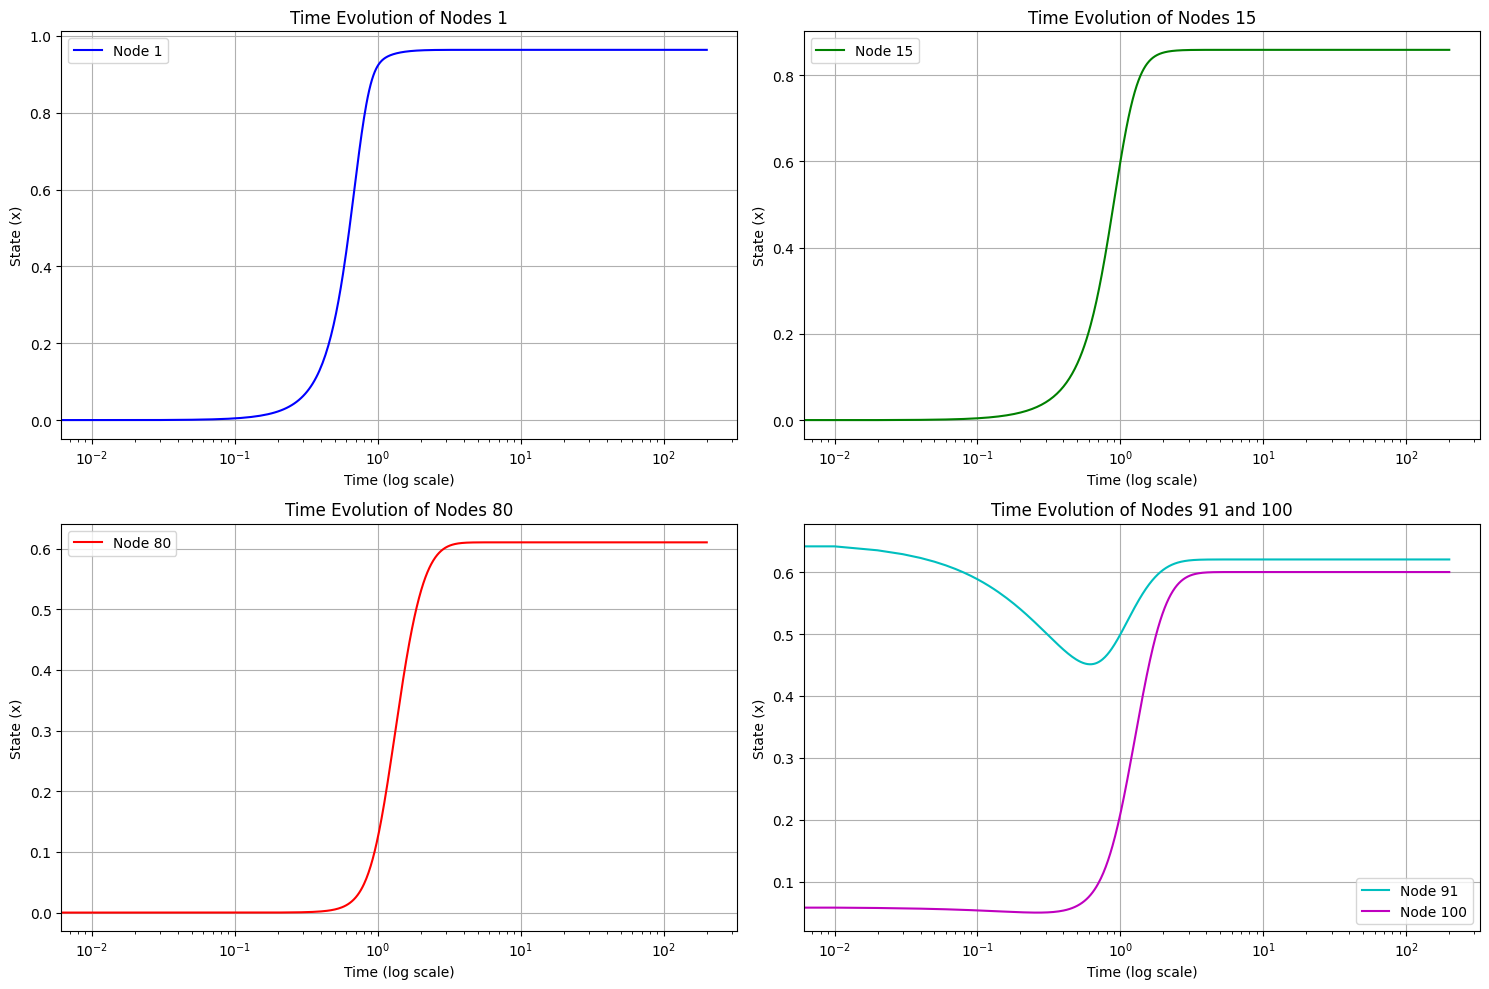

In [8]:
# Plotting
plt.figure(figsize=(15, 10))

# Plot for nodes 1, 15, 80
plt.subplot(2,2,1)
plt.semilogx(time, x_history[:, 0], 'b-', label='Node 1')
plt.xlabel('Time (log scale)')
plt.ylabel('State (x)')
plt.title('Time Evolution of Nodes 1')
plt.grid(True)
plt.legend()

plt.subplot(2,2,2)
plt.semilogx(time, x_history[:, 14], 'g-', label='Node 15')
plt.xlabel('Time (log scale)')
plt.ylabel('State (x)')
plt.title('Time Evolution of Nodes 15')
plt.grid(True)
plt.legend()

plt.subplot(2,2,3)
plt.semilogx(time, x_history[:, 79], 'r-', label='Node 80')
plt.xlabel('Time (log scale)')
plt.ylabel('State (x)')
plt.title('Time Evolution of Nodes 80')
plt.grid(True)
plt.legend()

plt.subplot(2,2,4)
plt.semilogx(time, x_history[:, 90], 'c-', label='Node 91')
plt.semilogx(time, x_history[:, 99], 'm-', label='Node 100')
plt.xlabel('Time (log scale)')
plt.ylabel('State (x)')
plt.title('Time Evolution of Nodes 91 and 100')
plt.grid(True)
plt.legend()

plt.tight_layout()

### After Perturbation:

In [9]:
def perturb_simulate_step(x,A,alpha,beta,dt,perturbed_node,fixed_value):
    # Calculate sum of Aij*xj for each i
    interaction_term = np.dot(A, x)
    
    # Calculate dx/dt for each node
    dxdt = -alpha * x + beta * (1 - x) * interaction_term
    
    # Euler step
    x_new = x + dt * dxdt

    x_new[perturbed_node] = fixed_value # permanent perturbation
    # Ensure values stay in [0, 1]
    x_new = np.clip(x_new, 0, 1)
    
    return x_new

In [17]:
# Parameters
max_steps = 20000  # total steps
perturbed_node =  0
perturbation_constant = 0.3


In [18]:
x_history2 = np.zeros((steps+1,N))
# print("Before Perturbation",x)
fixed_value = np.clip(x[perturbed_node] + perturbation_constant, 0, 1)
x[perturbed_node] = fixed_value
# print("After Perturbation",x)


In [19]:
# # Run simulation
# for t in range(steps):
#     x = perturb_simulate_step(x, A, alpha, beta, dt,perturbed_node,fixed_value)
#     x_history2[t + 1] = x

In [16]:
def check_steady(x1,x2):
    for i in (x1-x2):
        if(abs(i)>1e-10):
            return False
    return True

In [24]:
time_steady = max_steps

In [25]:
for t in range(max_steps):
    xcopy = x
    x = perturb_simulate_step(x, A, alpha, beta, dt,perturbed_node,fixed_value)
    if check_steady(xcopy,x):
        break
    x_history2[t + 1] = x

<Figure size 1500x1000 with 0 Axes>

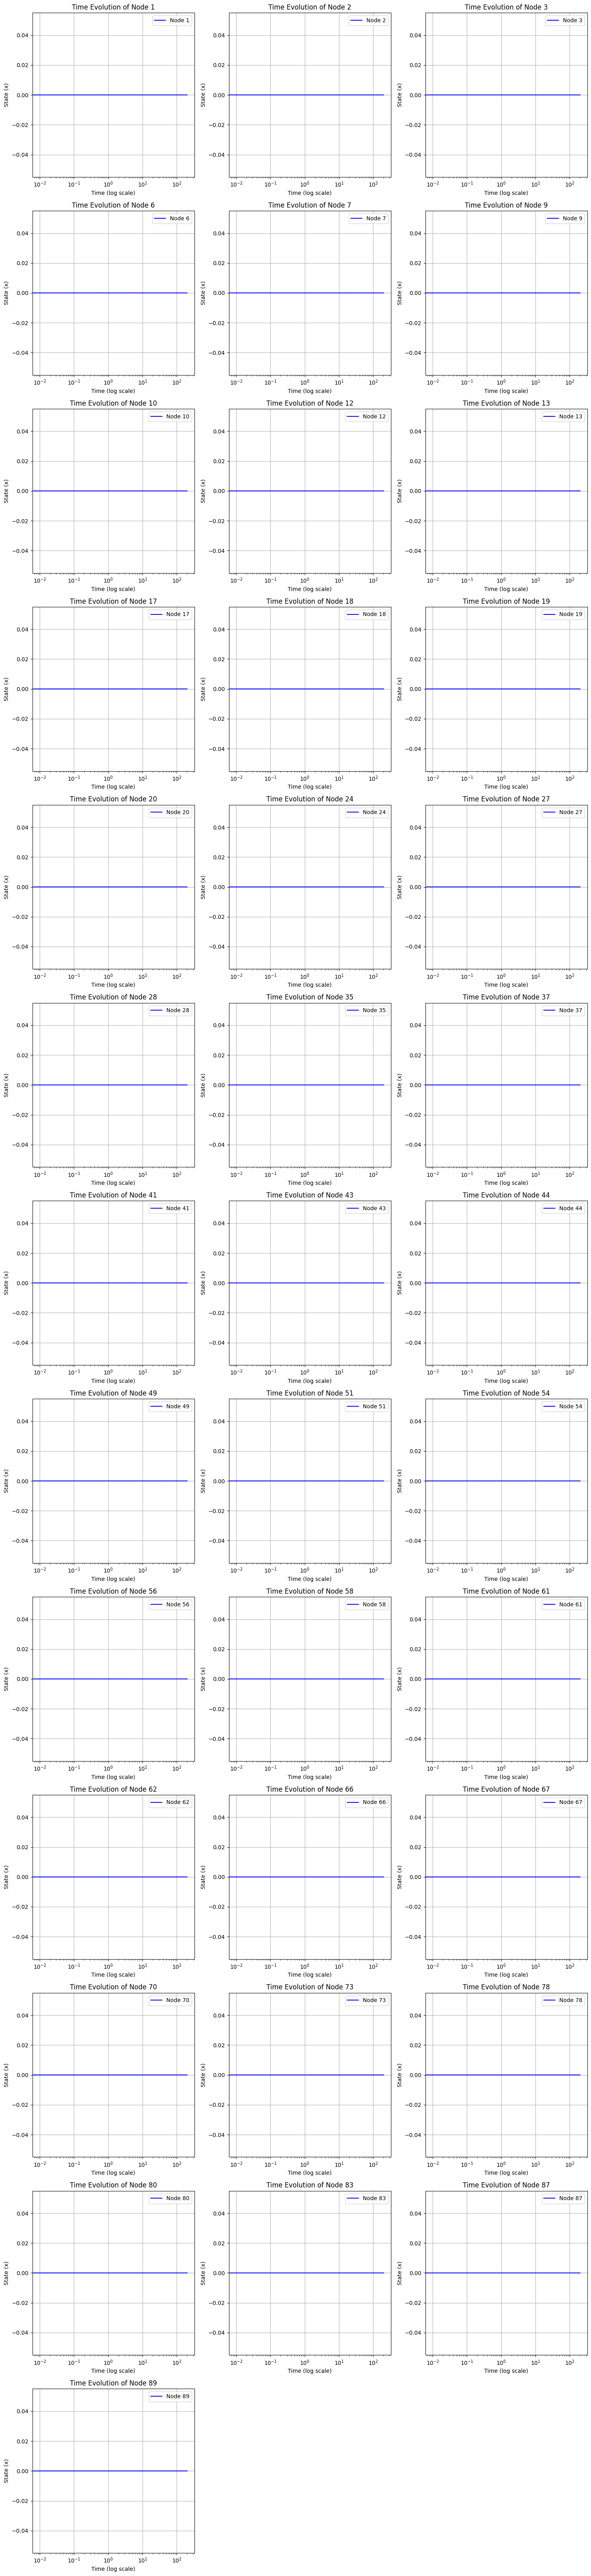

In [22]:
# Plotting
plt.figure(figsize=(15, 10))

adj_list =list(G.neighbors(perturbed_node))

num_plots = len(adj_list)  # Number of nodes to plot
# Determine number of rows and columns for subplots
cols = 3  # Adjust this to your desired number of columns
rows = (num_plots + cols - 1) // cols  # Compute the required number of rows

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Dynamically sized grid

# Flatten axes array if necessary
axes = axes.flatten()

# Plot for all nodes in the adjacency list
for i, node in enumerate(adj_list):
    axes[i].semilogx(time, x_history2[:, i], 'b-', label=f'Node {node}')
    axes[i].set_xlabel('Time (log scale)')
    axes[i].set_ylabel('State (x)')
    axes[i].set_title(f'Time Evolution of Node {node}')
    axes[i].grid(True)
    axes[i].legend()

# Hide any unused subplots
for j in range(len(adj_list), len(axes)):
    axes[j].axis('off')

plt.tight_layout()